In [16]:
## Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
pio.renderers.default='browser'

#### Exploring Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [21]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
customers = df.drop(columns = ['CustomerID'])

In [12]:
customers['Gender'] =  customers['Gender'].map({'Male':0,'Female':1})

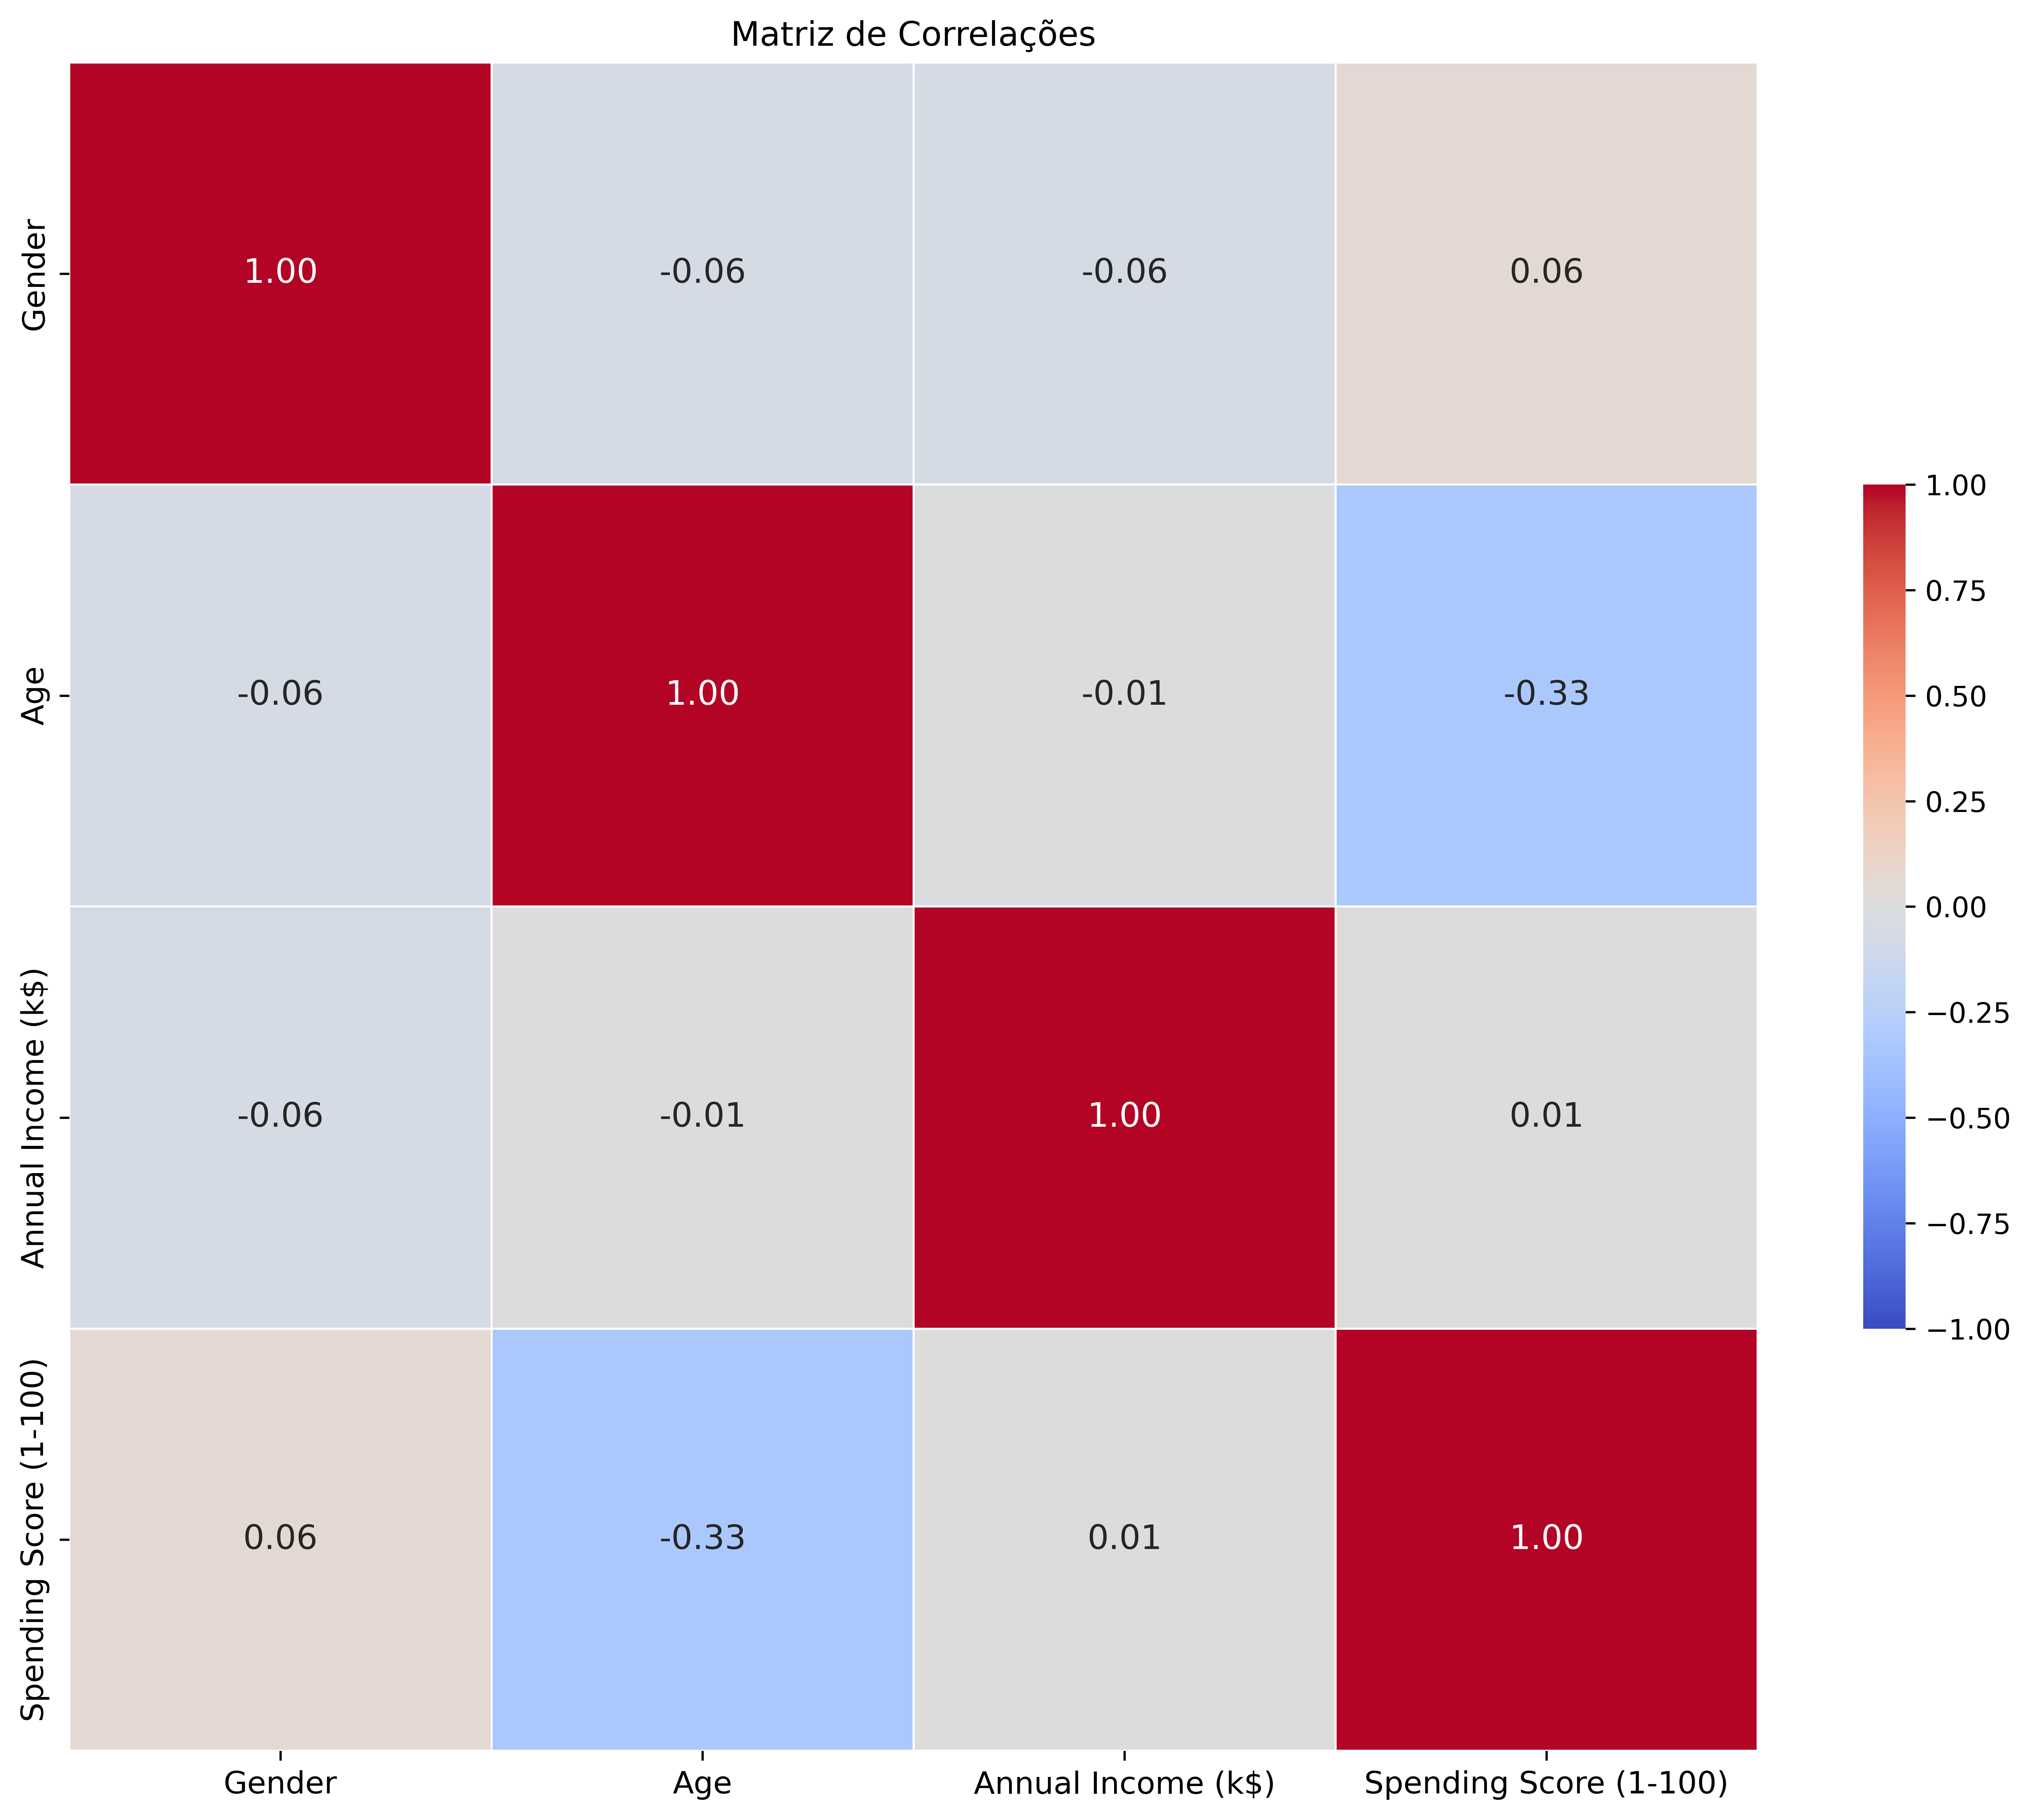

In [17]:
corr = customers.corr()
f, ax = plt.subplots(figsize=(11, 9), dpi=600)

sns.heatmap(corr, 
            cmap = plt.cm.coolwarm,
            vmax=1, 
            vmin = -1,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.2f', 
            annot_kws={'size': 12},
            cbar_kws={"shrink": 0.50})

plt.title('Matriz de Correlações')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 11)
ax.tick_params(axis = 'y', labelsize = 11)
ax.set_ylim(len(corr))

plt.show()

In [ ]:
customers_2 = df.drop(columns = ['CustomerID','Gender'])

In [19]:
fig = px.scatter_3d(customers_2, 
                    x='Age', 
                    y='Annual Income (k$)', 
                    z='Spending Score (1-100)')

fig.write_html('customers_inicial.html')

c:\Users\Marco Barthem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



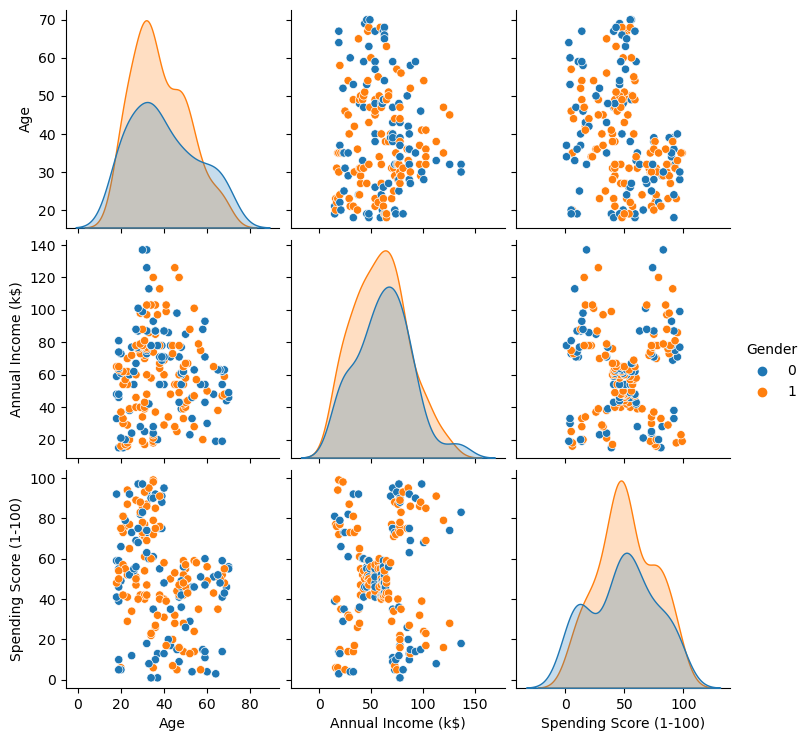

In [23]:
sns.pairplot(customers, hue="Gender")
plt.show()


### Clustering

In [25]:
customers_pad = customers_2.apply(zscore, ddof=1)

# As variáveis passam a ter média = 0 e desvio padrão = 1
print(np.round(customers_pad.mean(), 5))
print(np.round(customers_pad.std(), 5))

Age                      -0.0
Annual Income (k$)       -0.0
Spending Score (1-100)   -0.0
dtype: float64
Age                       1.0
Annual Income (k$)        1.0
Spending Score (1-100)    1.0
dtype: float64


c:\Users\Marco Barthem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Marco Barthem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Marco Barthem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Marco Barthem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variabl

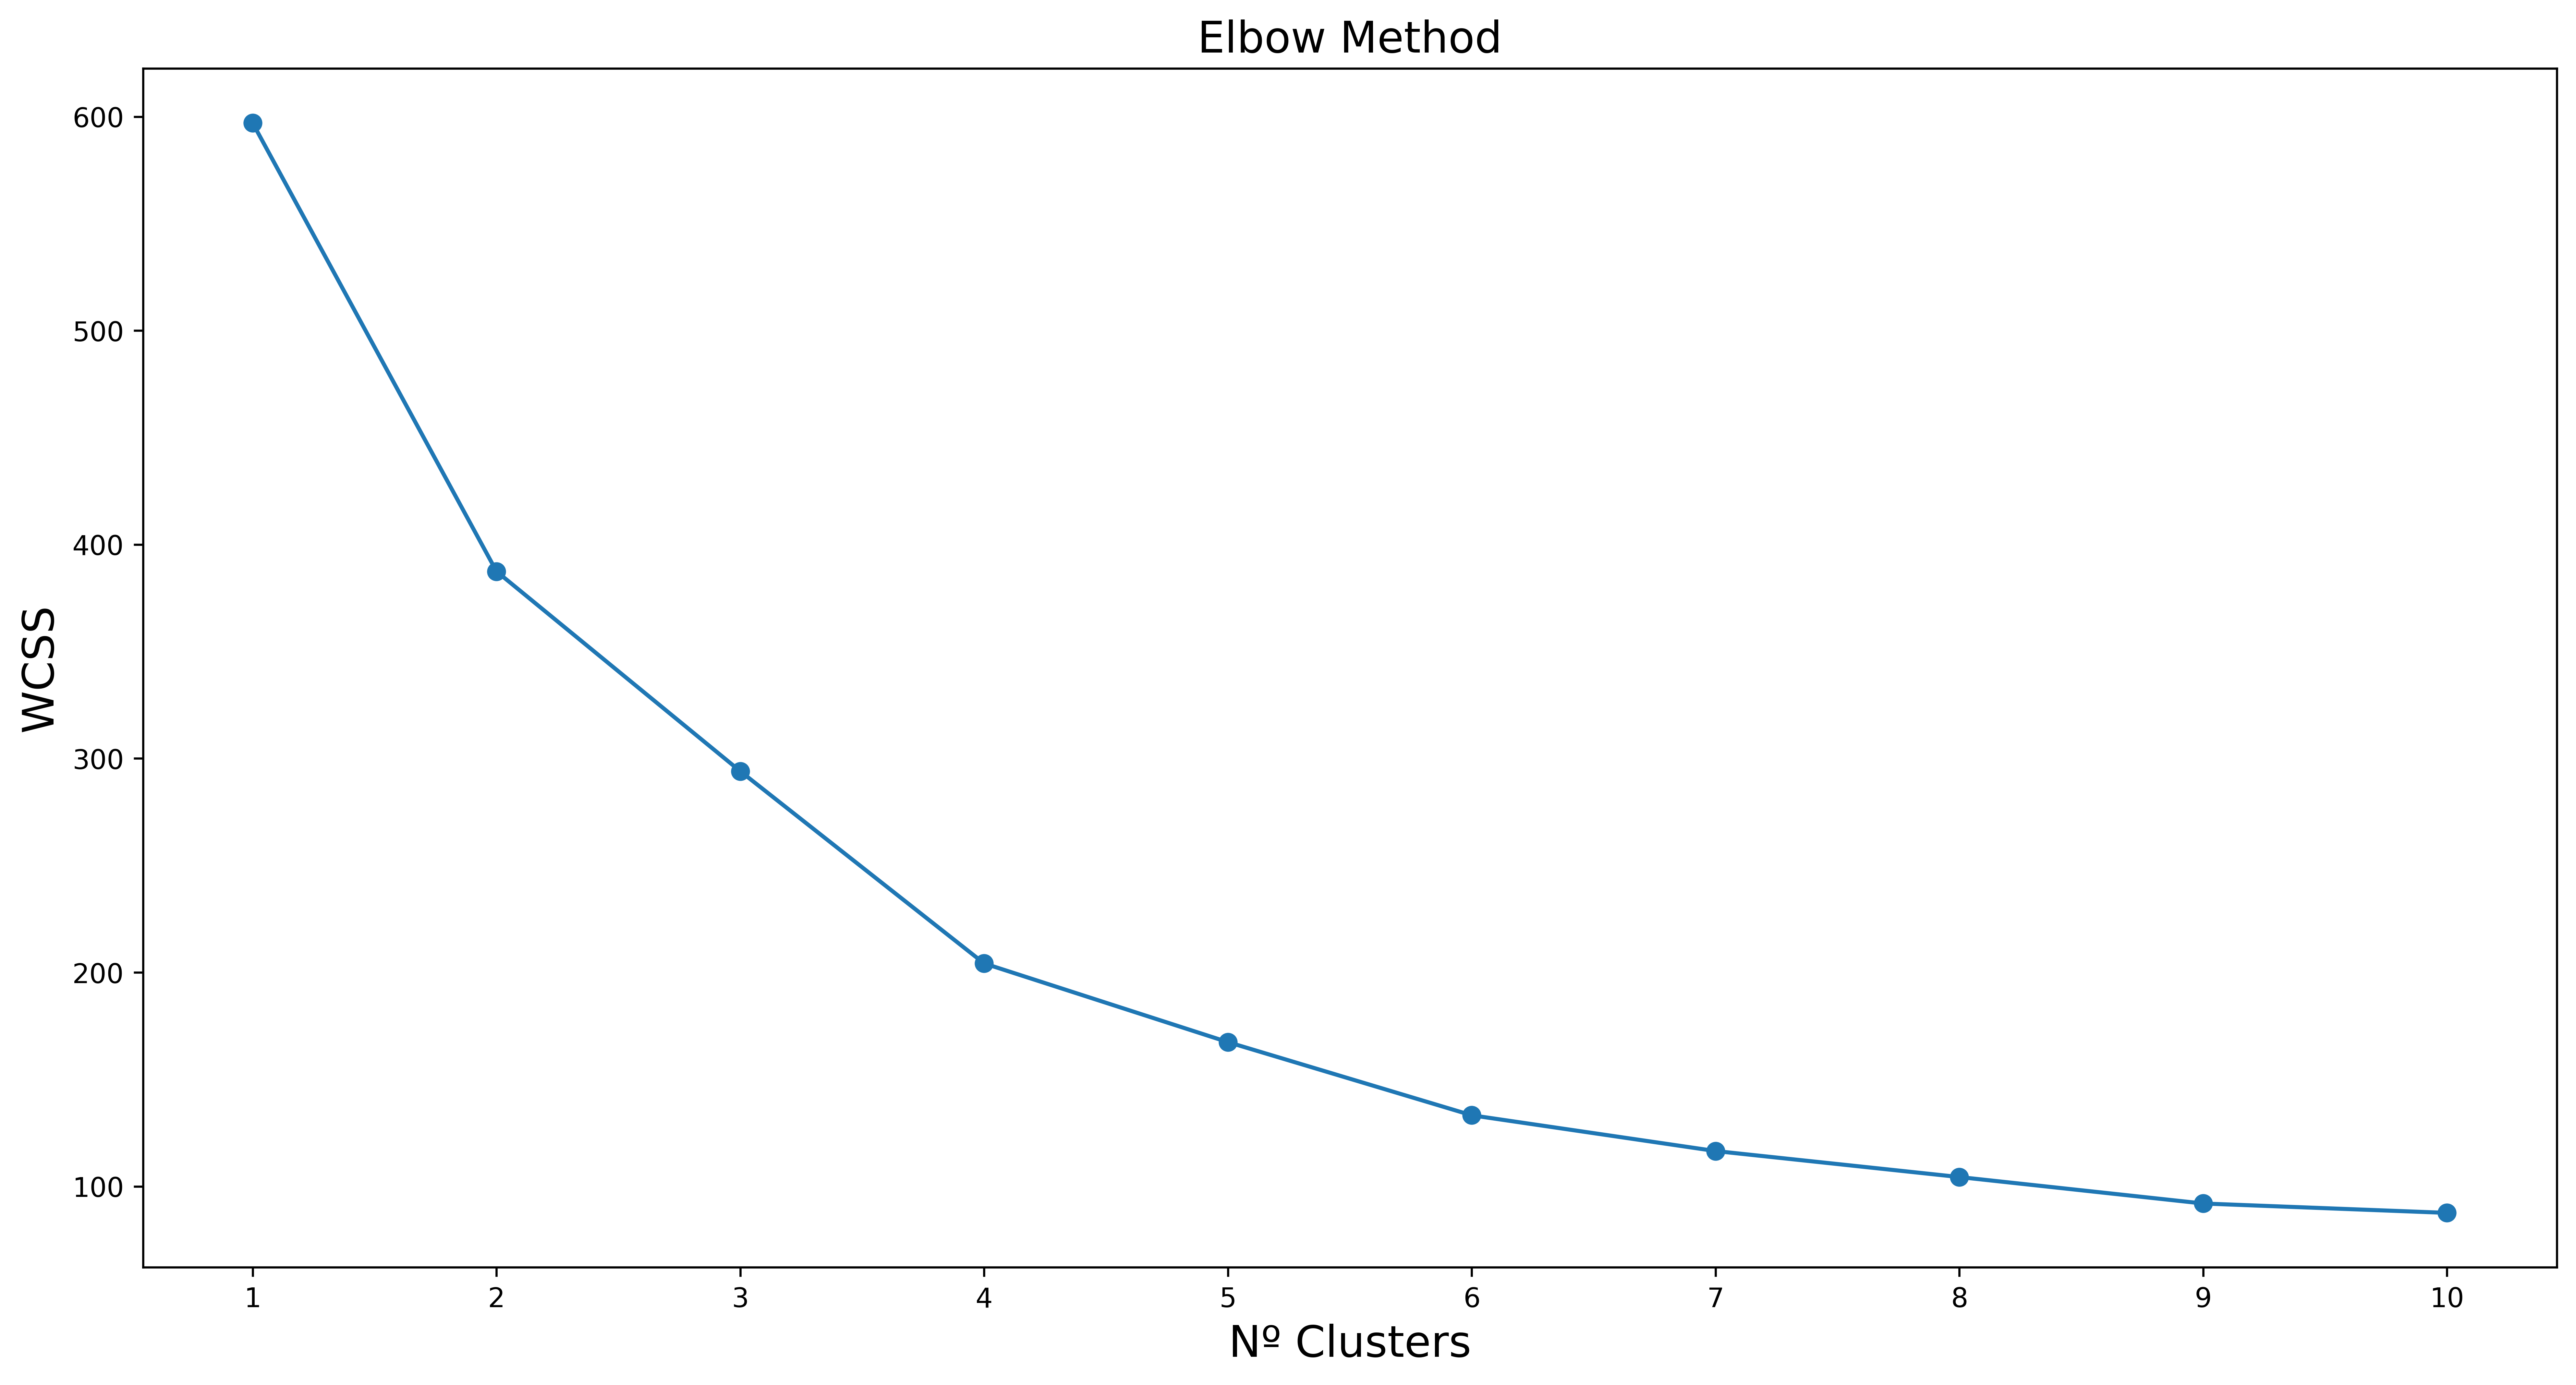

In [ ]:
### Elbow Metod
elbow = []
I = range(1,11)
for i in I:
    kmeanElbow = KMeans(n_clusters=i, init='random', random_state=100).fit(customers_pad)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16,8), dpi=600)
plt.plot(I, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11)) 
plt.ylabel('WCSS', fontsize=16)
plt.title('Elbow Method', fontsize=16)
plt.show()


c:\Users\Marco Barthem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Marco Barthem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Marco Barthem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Marco Barthem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variabl

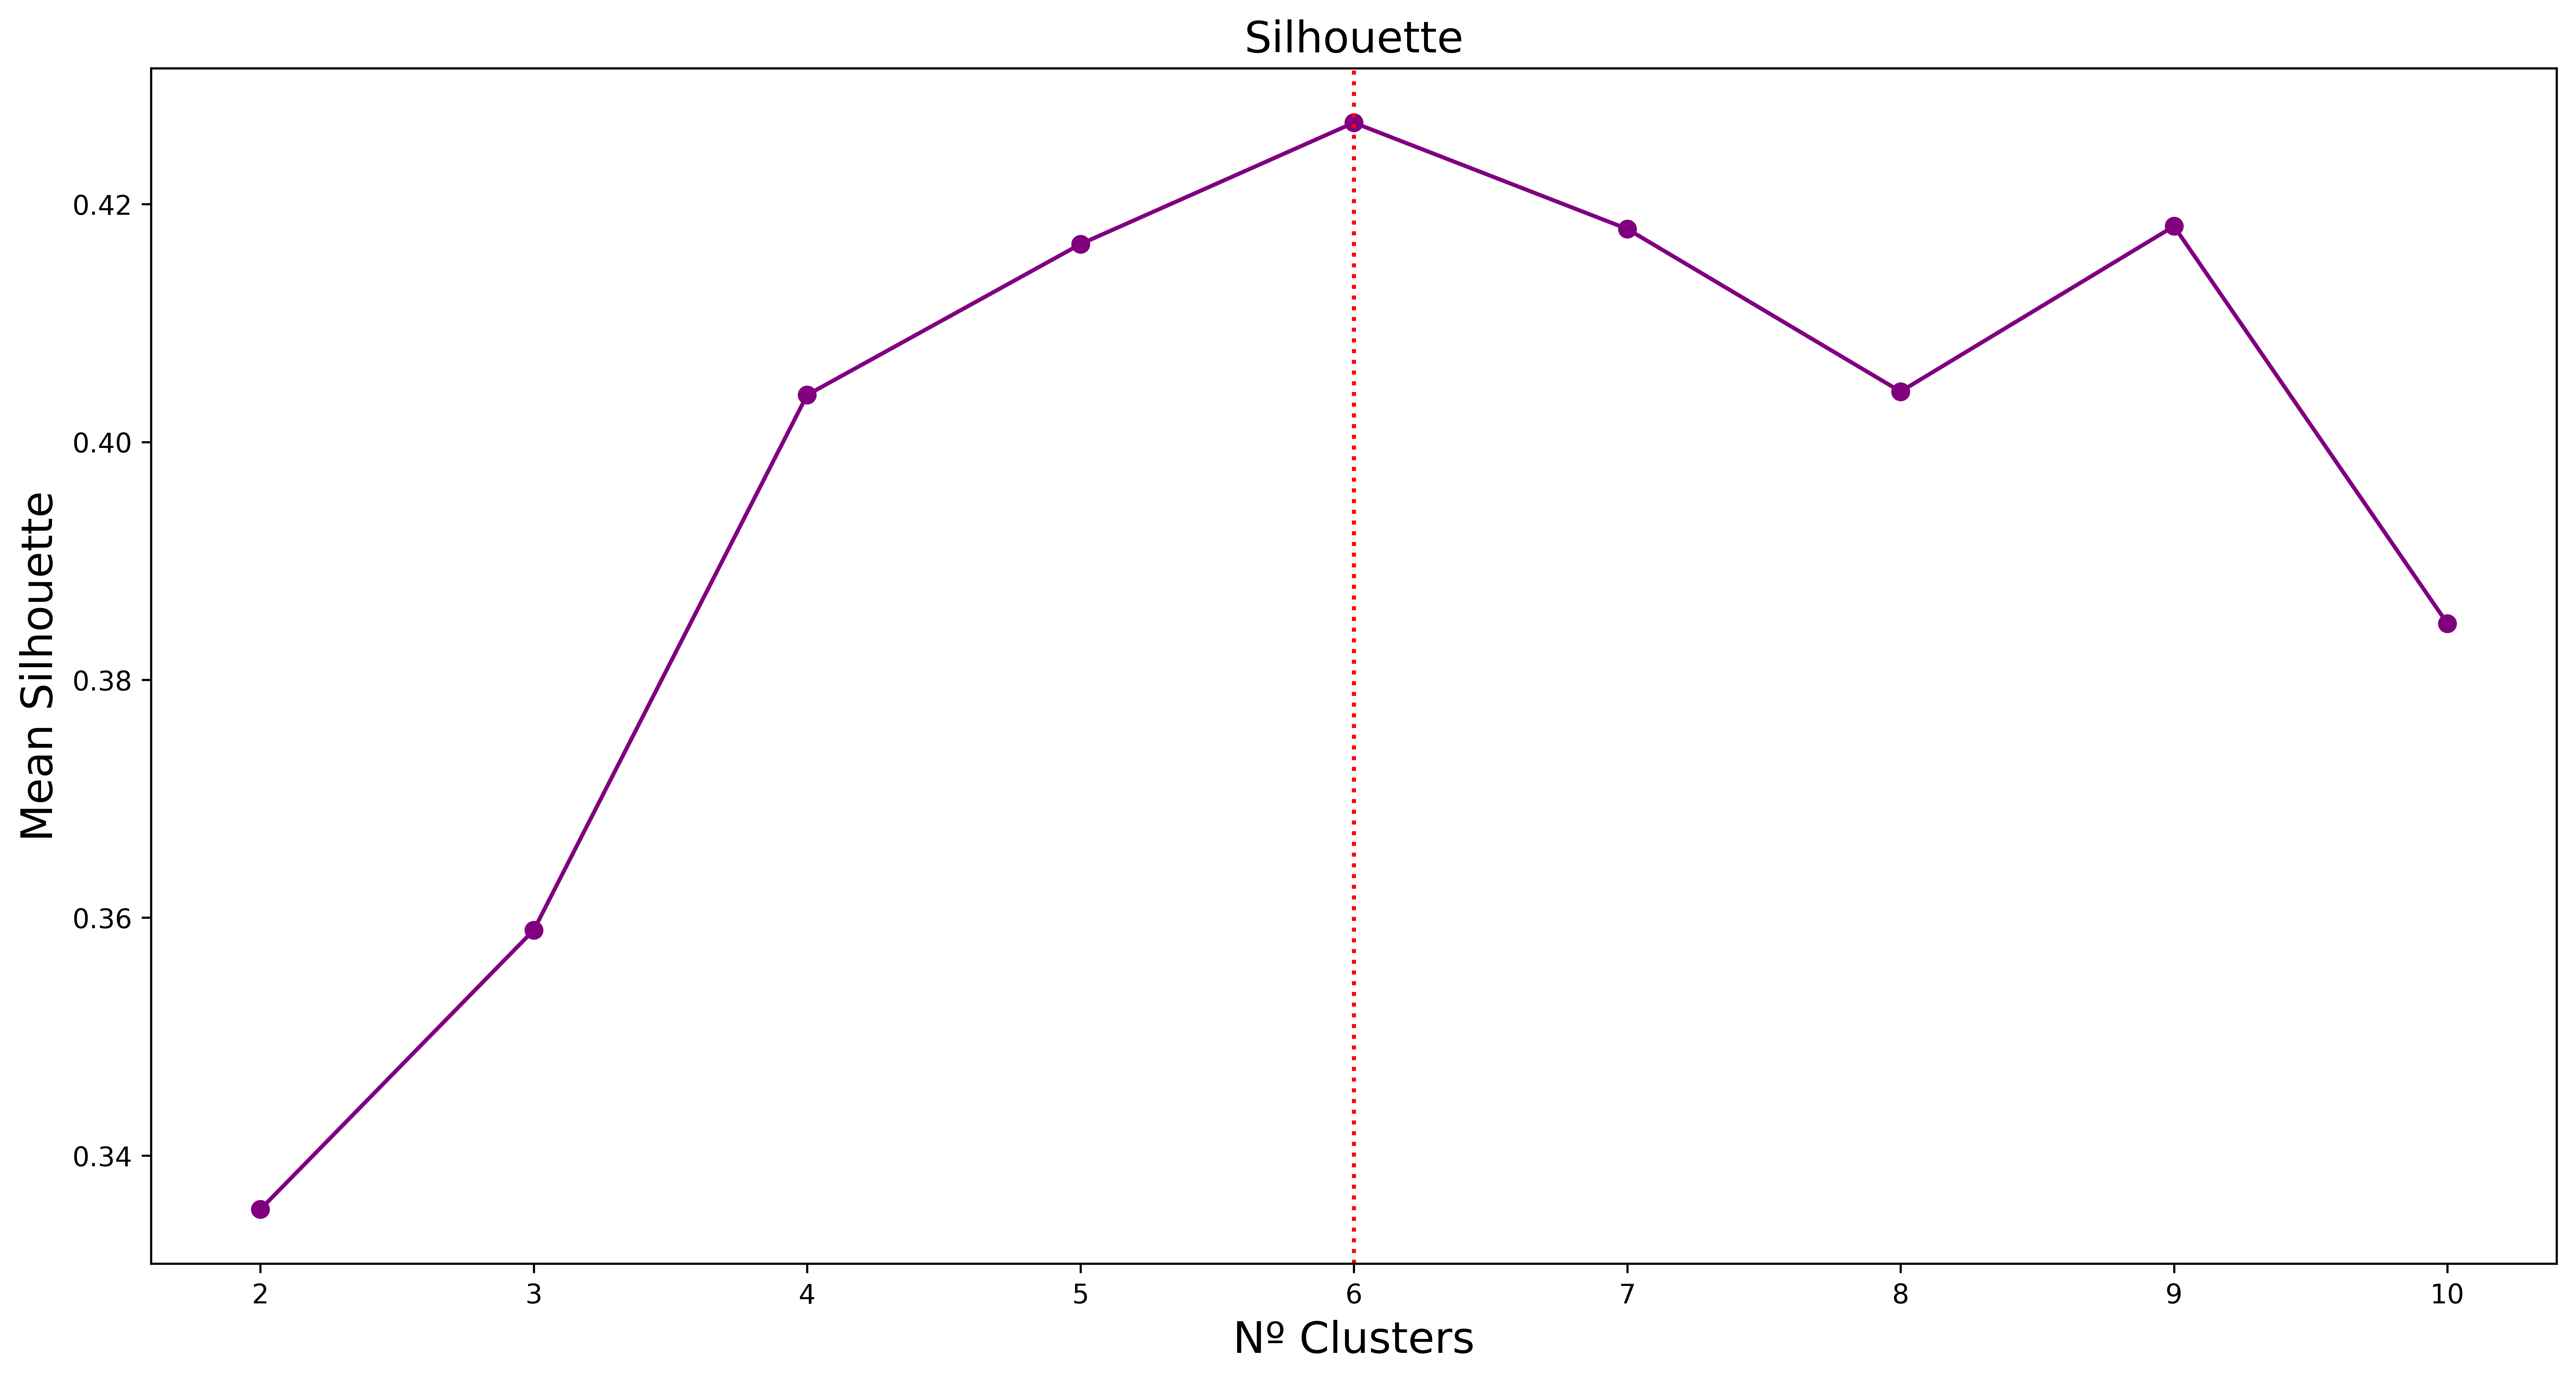

In [30]:
### Silhouette Metod
silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(customers_pad)
    silhueta.append(silhouette_score(customers_pad, kmeansSil.labels_))

plt.figure(figsize=(16,8), dpi=600)
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o') # ajustar range
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Mean Silhouette', fontsize=16)
plt.title('Silhouette', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()


In [32]:
Kmeans_cluster = KMeans(n_clusters = 6,init='random',random_state=100).fit(customers_pad)
kmeans_clusters = Kmeans_cluster.labels_
customers_2['cluster_kmeans'] = kmeans_clusters
customers_pad['cluster_kmeans'] = kmeans_clusters
customers_2['cluster_kmeans'] = customers_2['cluster_kmeans'].astype('category')
customers_pad['cluster_kmeans'] = customers_pad['cluster_kmeans'].astype('category')

c:\Users\Marco Barthem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Marco Barthem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [34]:
fig1 = px.scatter_3d(customers_2, 
                     x='Age', 
                     y='Annual Income (k$)', 
                     z='Spending Score (1-100)',
                     color='cluster_kmeans')

fig1.write_html('Cluster_seg.html')

In [36]:
pg.anova(dv='Age', 
         between='cluster_kmeans', 
         data=customers_pad,
         detailed=True).T



,0,1
Source,cluster_kmeans,Within
SS,133.833408,65.166592
DF,5,194
MS,26.766682,0.33591
F,79.684023,NaN
p-unc,0.0,NaN
np2,0.67253,NaN


In [37]:
pg.anova(dv='Annual Income (k$)', 
         between='cluster_kmeans', 
         data=customers_pad,
         detailed=True).T


,0,1
Source,cluster_kmeans,Within
SS,157.357808,41.642192
DF,5,194
MS,31.471562,0.21465
F,146.617714,NaN
p-unc,0.0,NaN
np2,0.790743,NaN


In [38]:

pg.anova(dv='Spending Score (1-100)', 
         between='cluster_kmeans', 
         data=customers_pad,
         detailed=True).T


,0,1
Source,cluster_kmeans,Within
SS,172.589358,26.410642
DF,5,194
MS,34.517872,0.136137
F,253.551849,NaN
p-unc,0.0,NaN
np2,0.867283,NaN


In [ ]:
Group_Customers = customers_2.groupby(by=['cluster_kmeans'], observed=True)

tab_median_group = Group_Customers.mean().T

In [42]:
Cluster_segmentation = tab_median_group.transpose()

In [46]:
Cluster_segmentation = Cluster_segmentation.reset_index().rename(columns={"index": "cluster"})


In [48]:
Cluster_segmentation['Cluster_Desc'] = Cluster_segmentation['cluster_kmeans'].map({
    0: 'High Income, Low Spending',
    1: 'High Income, High Spending (Top Clients)',
    2: 'Low Income, Low Spending',
    3: 'Mid Income, Moderate Spending (Young Adults)',
    4: 'Mid Income, Moderate Spending (Older Adults)',
    5: 'Low Income, High Spending (Young Spenders)'
})


In [49]:
Cluster_segmentation

,cluster_kmeans,Age,Annual Income (k$),Spending Score (1-100),Cluster_Desc
0,0,41.264706,88.500000,16.764706,"High Income, Low Spending"
1,1,32.692308,86.538462,82.128205,"High Income, High Spending (Top Clients)"
2,2,45.523810,26.285714,19.380952,"Low Income, Low Spending"
3,3,27.000000,56.657895,49.131579,"Mid Income, Moderate Spending (Young Adults)"
4,4,56.333333,54.266667,49.066667,"Mid Income, Moderate Spending (Older Adults)"
5,5,25.000000,25.260870,77.608696,"Low Income, High Spending (Young Spenders)"


In [51]:
Cluster_segmentation.to_csv('Customers_Cluster.csv')

In [53]:
customers['cluster_kmeans'] = kmeans_clusters
customers['cluster_kmeans'] = customers['cluster_kmeans'].astype('category')

In [54]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans
0,0,19,15,39,5
1,0,21,15,81,5
2,1,20,16,6,2
3,1,23,16,77,5
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,0
197,0,32,126,74,1
198,0,32,137,18,0


In [55]:
customers.to_csv('Mall_Customers_Cluster.csv')